Loading required package: ggrepel
Loading required package: ggplot2


[1] FALSE

Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_text_repel).”

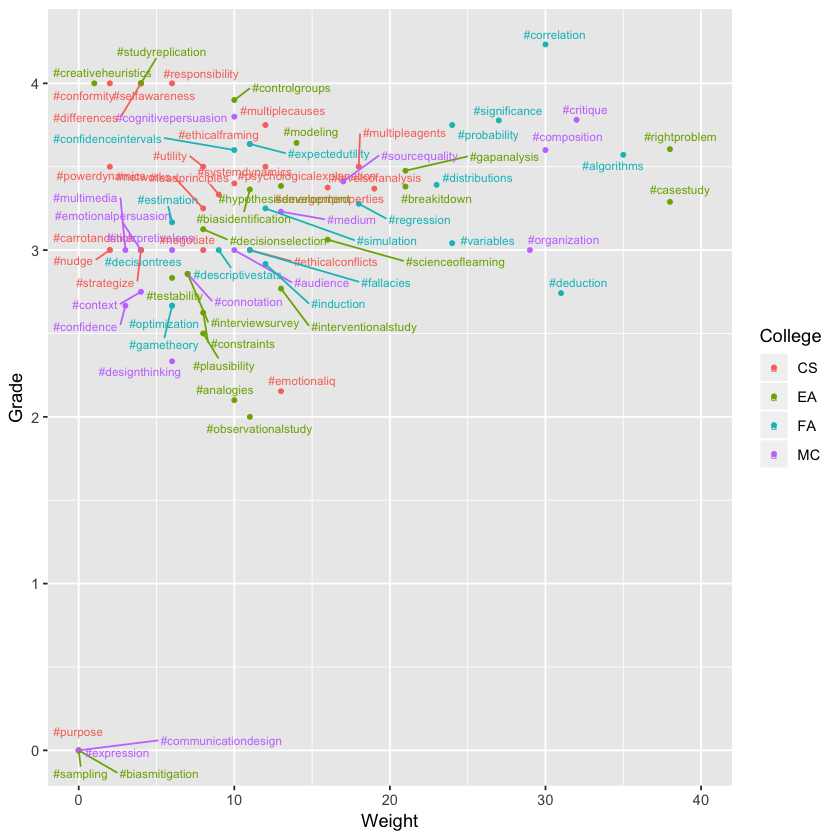

In [1]:
require('ggrepel')
df = read.csv('grades.csv', colClasses = c("character", "factor", "factor", "character", "integer", "character", "numeric", "factor"))
df = df[!is.na(df$Grade),]
df$total = df$Weighting * df$Grade

hcweights = unlist(tapply(df$Weighting, df$HC, sum))
hcweights = data.frame(Weighting=unlist(hcweights))

hcsums = unlist(tapply(df$total, df$HC, sum))
hcsums = data.frame(Sumgrades = unlist(hcsums))

gradevsweights = data.frame(Grade = (hcsums/hcweights)$Sumgrades, Weight = hcweights$Weighting, row.names = row.names(hcsums))

CS = c('#psychologicalexplanation', '#multiplecauses', '#levelsofanalysis', '#ethicalconflicts', '#leadprinciples', '#emergentproperties', '#multipleagents', '#ethicalframing', '#systemdynamics', '#strategize', '#networks',  '#negotiate', '#utility', '#carrotandstick', '#selfawareness', '#responsibility', '#purpose', '#powerdynamics',  '#nudge', '#differences', '#conformity', '#emotionaliq')
EA = c('#rightproblem', '#dataviz', '#casestudy', '#gapanalysis', '#breakitdown', '#modeling', '#controlgroups', '#hypothesisdevelopment', '#observationalstudy', '#scienceoflearning',  '#interventionalstudy', '#creativeheuristics', '#testability', '#studyreplication', '#sampling',  '#interviewsurvey', '#decisionselection', '#biasmitigation', '#biasidentification', '#plausibility',  '#constraints', '#analogies')
FA = c('#correlation', '#algorithms', '#variables', '#regression', '#fallacies', '#expectedutility',  '#simulation', '#significance', '#induction', '#estimation', '#descriptivestats', '#gametheory', '#probability', '#optimization', '#distributions', '#decisiontrees', '#confidenceintervals', '#deduction')
MC = c('#thesis', '#composition', '#evidencebased', '#critique', '#professionalism', '#organization', '#sourcequality', '#audience', '#context', '#medium', '#interpretivelens', '#multimedia', '#expression', '#emotionalpersuasion', '#communicationdesign', '#cognitivepersuasion', '#connotation', '#confidence', '#designthinking')

Allhcs = c(CS, EA, FA, MC)

Unused = as.data.frame(matrix(0, nrow = sum(!Allhcs %in% row.names(gradevsweights)), ncol = 2 ),row.names = Allhcs[!Allhcs %in% row.names(gradevsweights)])
colnames(Unused) = colnames(gradevsweights)

fullhcdf = rbind(Unused, gradevsweights)
fullhcdf['College'] = NA

for (i in 1:nrow(fullhcdf)){
    if (row.names(fullhcdf)[i] %in% CS){fullhcdf[i,'College'] = "CS"}
    else if (row.names(fullhcdf)[i] %in% EA){fullhcdf[i,'College'] = "EA"}
    else if (row.names(fullhcdf)[i] %in% FA){fullhcdf[i,'College'] = "FA"}
    else if (row.names(fullhcdf)[i] %in% MC){fullhcdf[i,'College'] = "MC"}
}

any(is.na(fullhcdf$College))
fullhcdf$College = as.factor(fullhcdf$College)

ggplot(fullhcdf, aes(Weight, Grade, color = College)) + geom_point(size = 1) + geom_text_repel(size = 2.5, label = row.names(fullhcdf)) + xlim(0,40)

# ggplot(gradevsweights, aes(Weight, Grade)) + geom_point(size = 1) + geom_text_repel(size = 2.5, label = row.names(gradevsweights)) + xlim(0,40)

## HC Mastery/Letter Grade

In [38]:
nonzeromean = function(x){mean(x[x>0])}

hcs = tapply(fullhcdf$Grade, fullhcdf$College, nonzeromean)
hcs

CS       EA       FA       MC 
3.393665 3.160305 3.260459 3.109015

## Transfer Scope

In [39]:
scopedf = rbind(greater3 = tapply(fullhcdf$Grade >= 3, fullhcdf$College, sum), total = table(fullhcdf[, "College"]))
scopedf = rbind(scopedf, proportion = scopedf[1,] / scopedf[2,])

scope = sapply(scopedf[3,], FUN = function(ns){min(5, 1 + 2.35*(ns/0.4))})
scope

CS       EA       FA       MC 
5.000000 4.471591 5.000000 4.710526

## Transfer Competence

In [41]:
hcs * 0.6 + scope * 0.25 + c(1.86, 2.45, 2.47, 2.64) * 0.15

CS       EA       FA       MC 
3.565199 3.381581 3.576775 3.439040

Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_text_repel).”

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


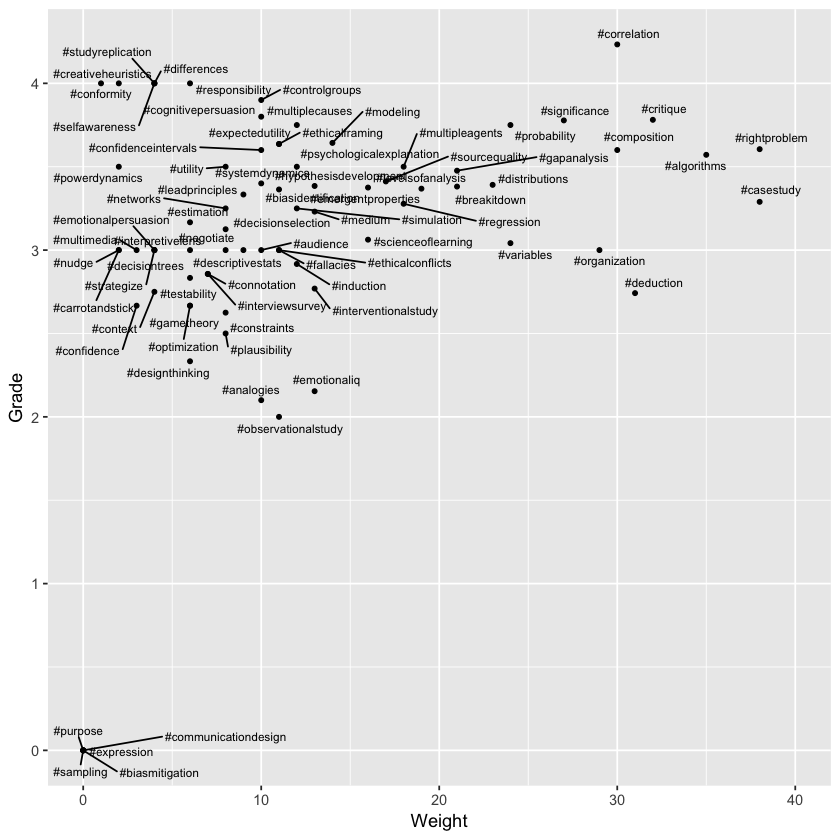

In [3]:
ggplot(fullhcdf, aes(Weight, Grade)) + geom_point(size = 1) + geom_text_repel(size = 2.5, label = row.names(fullhcdf)) + xlim(0,40)
lines(0:40, )
# add aline, everythingshould be above thecurve

In [ ]:
text(x = 1:73, y = 1:73)